In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
train_data = pd.read_csv('ETF prices.csv')

# Select only the numerical columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64'])

In [3]:
train_data

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
...,...,...,...,...,...,...,...,...
3866025,ZSL,2021-11-23,26.81,27.21,26.30,26.35,26.35,190900
3866026,ZSL,2021-11-24,26.79,26.96,26.57,26.69,26.69,109000
3866027,ZSL,2021-11-26,26.67,28.14,26.67,27.72,27.72,205500
3866028,ZSL,2021-11-29,27.89,28.56,27.80,28.27,28.27,411900


In [4]:
train_data.describe()

,open,high,low,close,adj_close,volume
count,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06
mean,1.202537e+05,1.262811e+05,1.149734e+05,1.196726e+05,1.196579e+05,1.026745e+06
std,1.149917e+07,1.208270e+07,1.097204e+07,1.143655e+07,1.143655e+07,1.275733e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.486000e+01,2.494000e+01,2.476000e+01,2.485000e+01,2.229000e+01,3.553000e+03
50%,3.388000e+01,3.406000e+01,3.368000e+01,3.387000e+01,3.108000e+01,2.133900e+04
75%,5.417000e+01,5.441000e+01,5.390000e+01,5.416000e+01,5.007000e+01,1.269000e+05
max,2.656750e+09,2.808750e+09,2.609750e+09,2.808750e+09,2.808750e+09,2.987062e+09


In [5]:
# Calculate the correlation matrix
numerical_columns.corr()

,open,high,low,close,adj_close,volume
open,1.000000,0.998856,0.999147,0.997609,0.997609,-0.000841
high,0.998856,1.000000,0.998772,0.998910,0.998910,-0.000841
low,0.999147,0.998772,1.000000,0.998906,0.998906,-0.000843
close,0.997609,0.998910,0.998906,1.000000,1.000000,-0.000842
adj_close,0.997609,0.998910,0.998906,1.000000,1.000000,-0.000842
volume,-0.000841,-0.000841,-0.000843,-0.000842,-0.000842,1.000000


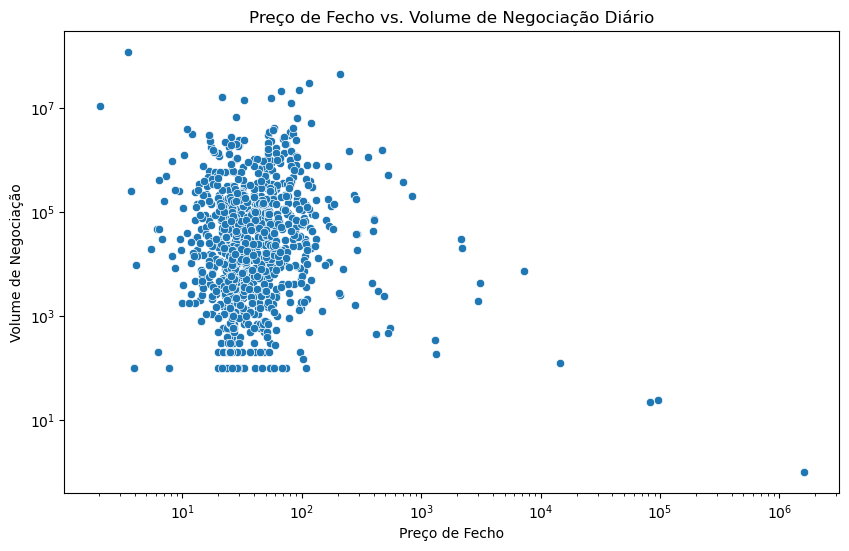

In [8]:
import seaborn as sns
sampled_data = train_data.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='close', y='volume', data=sampled_data)
plt.title('Preço de Fecho vs. Volume de Negociação Diário')
plt.xlabel('Preço de Fecho')
plt.ylabel('Volume de Negociação')
plt.xscale('log')
plt.yscale('log')
plt.show()

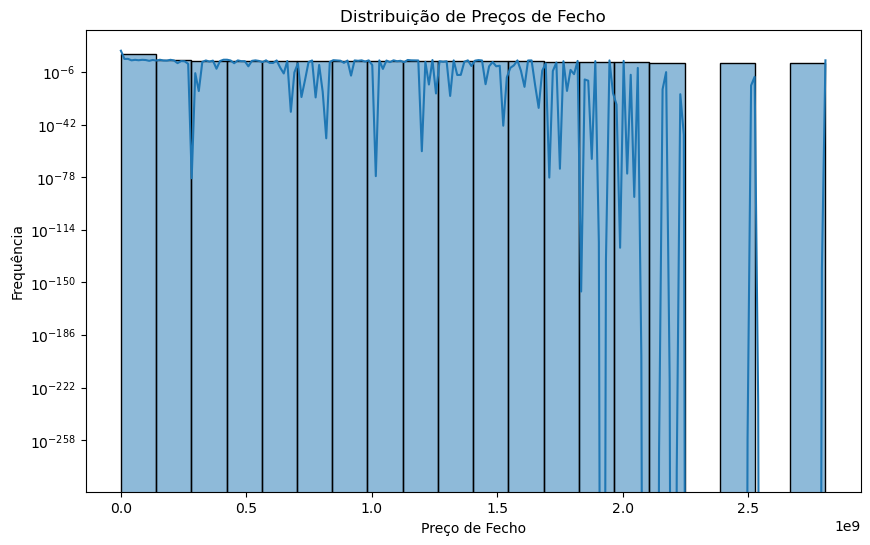

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['close'], bins=20, kde=True)
plt.title('Distribuição de Preços de Fecho')
plt.xlabel('Preço de Fecho')
plt.ylabel('Frequência')
plt.yscale('log')  
plt.show()

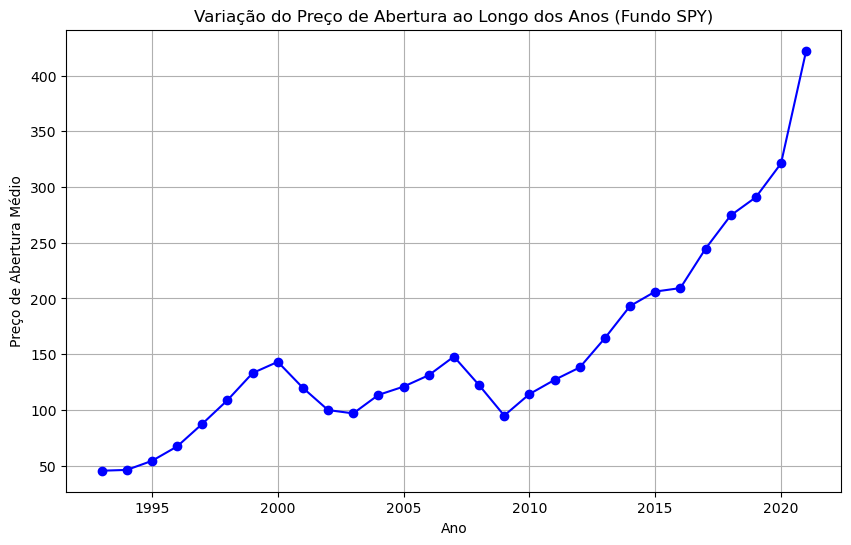

In [11]:
data = pd.read_csv('ETF prices.csv')

data['price_date'] = pd.to_datetime(data['price_date'])

data['year'] = data['price_date'].dt.year

aaa_data = data[data['fund_symbol'] == 'SPY']

mean_open_by_year = aaa_data.groupby('year')['open'].mean()

plt.figure(figsize=(10, 6))
mean_open_by_year.plot(kind='line', marker='o', color='b')
plt.title('Variação do Preço de Abertura ao Longo dos Anos (Fundo SPY)')
plt.xlabel('Ano')
plt.ylabel('Preço de Abertura Médio')
plt.grid(True)
plt.show()

(3866030, 6)

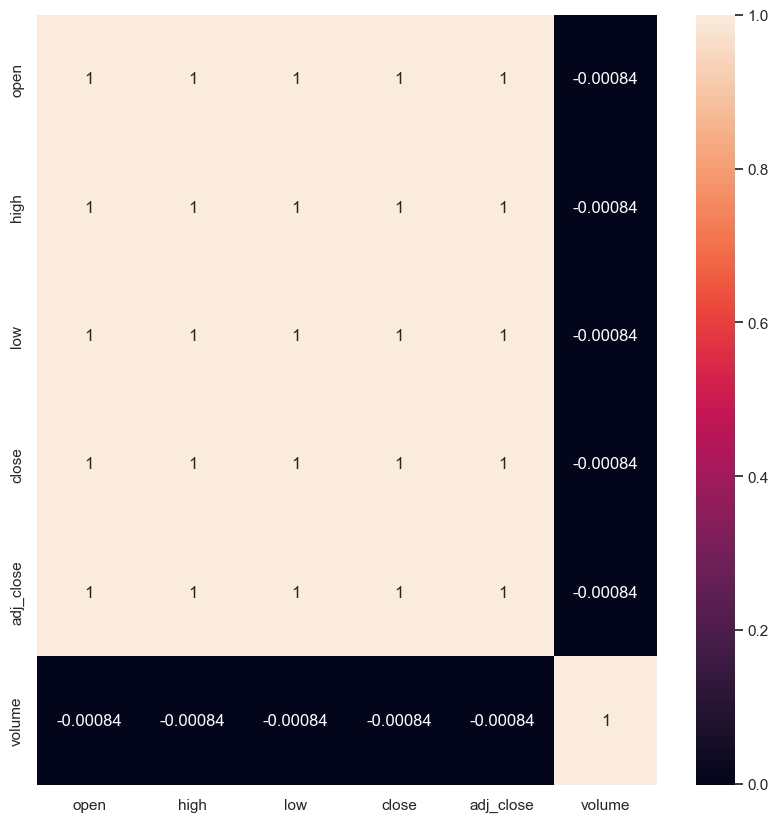

In [12]:
sns.set_theme(style="dark")
m=numerical_columns.corr()
sns.set(rc = {'figure.figsize' :(10, 10)})
sns.heatmap(m, annot=True)
numerical_columns.shape


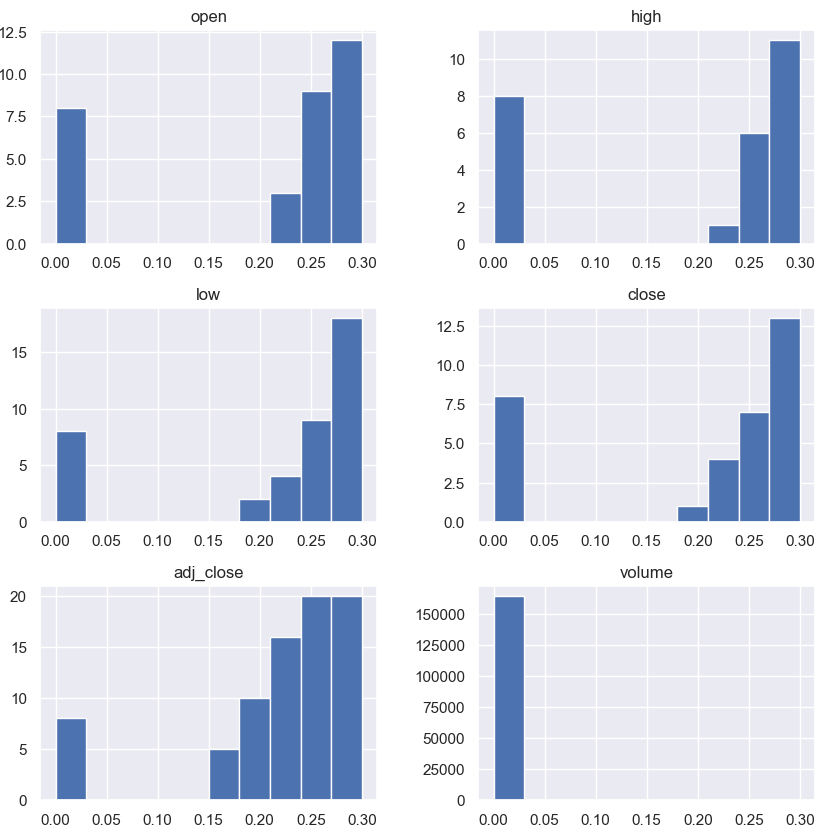

In [13]:
_ = numerical_columns.hist(figsize=(10, 10), range=(0, 0.3))

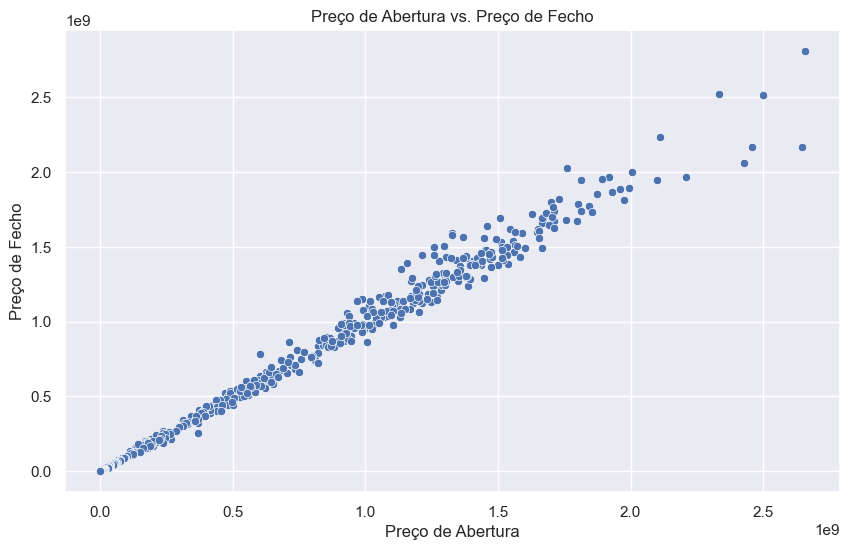

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='open', y='close', data=train_data)
plt.title('Preço de Abertura vs. Preço de Fecho')
plt.xlabel('Preço de Abertura')
plt.ylabel('Preço de Fecho')
plt.show()

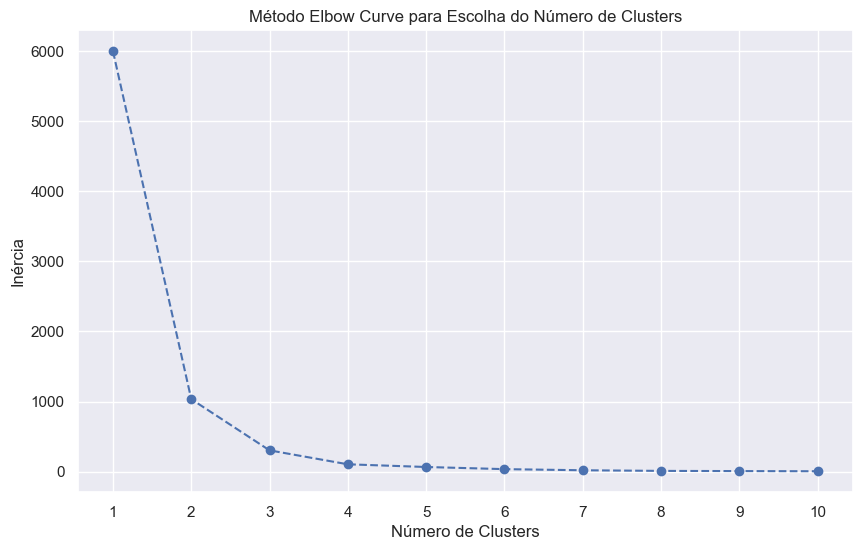

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read data from your CSV file
data = pd.read_csv('ETF prices.csv')

# Redução do número de amostras selecionando uma amostra aleatória do conjunto de dados original
sampled_data = data.sample(n=1000, random_state=42)  # Seleciona 1000 amostras aleatórias

# Seleção das características relevantes para o clustering
X = sampled_data[['open', 'high', 'low', 'close', 'adj_close', 'volume']]

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escolha do número de clusters usando o método Elbow Curve
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Definindo explicitamente o valor de n_init
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot da Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow Curve para Escolha do Número de Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

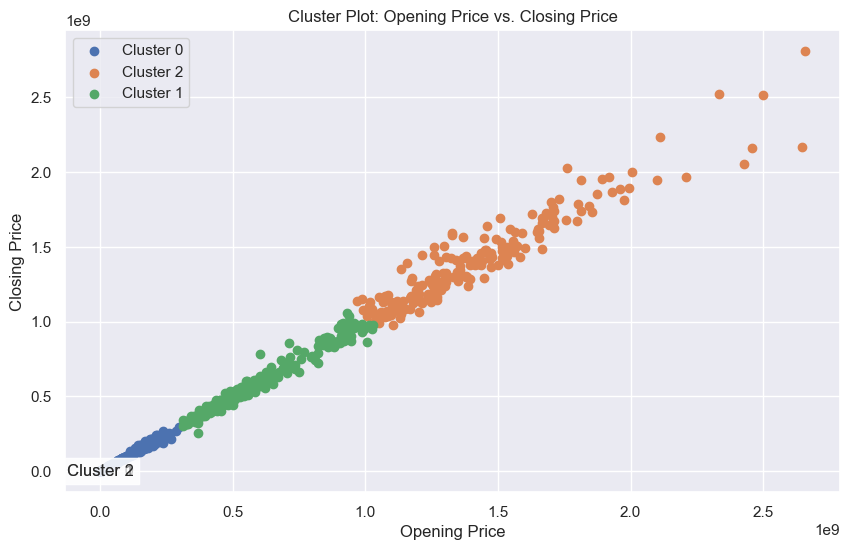

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read data from your CSV file
data = pd.read_csv('ETF prices.csv')

# Select the fields of interest for clustering
X = data[['open', 'close']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Execute the clustering algorithm
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the original data
data['cluster'] = kmeans.labels_

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['open'], cluster_data['close'], label=f'Cluster {cluster}')

plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.title('Cluster Plot: Opening Price vs. Closing Price')

# Calculate centroids of each cluster
centroids = kmeans.cluster_centers_

# Add labels to the plot
for label, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.grid(True)
plt.show()